# Crop Yield Prediction in India

#### Predicting yeild helps the state to get an estimate of the crop in a certain year to control the price rates. This model focuses on 
#### predicting the crop yield in advance by analyzing factors like location, season, and crop type through machine learning techniques on
#### prviously collected datasets

### Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score

### Importing the Dataset

In [4]:
crop_data = pd.read_csv("crop_production.csv")
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [5]:
crop_data.shape

(246091, 7)

In [6]:
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [7]:
# Statistical Inference of the dataset

crop_data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [8]:
# Checking missing values in the dataset in each column
crop_data.isnull().sum()

# Dropping missing values

crop_data = crop_data.dropna()
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [9]:
# final check for missing values

crop_data.isnull().values.any()

np.False_

In [10]:
# Displaying State Names present in the dataset.
crop_data.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [11]:
# Adding a new Column yield which indicates Production per unit Area.

crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])
crop_data.head(10)

/var/folders/zs/740q0x8j51ldg8r78cqky7f00000gn/T/ipykernel_5458/3415886050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,3583.223250
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0,2.777778
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0,2.000000
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0,3.000000
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0,4.225000


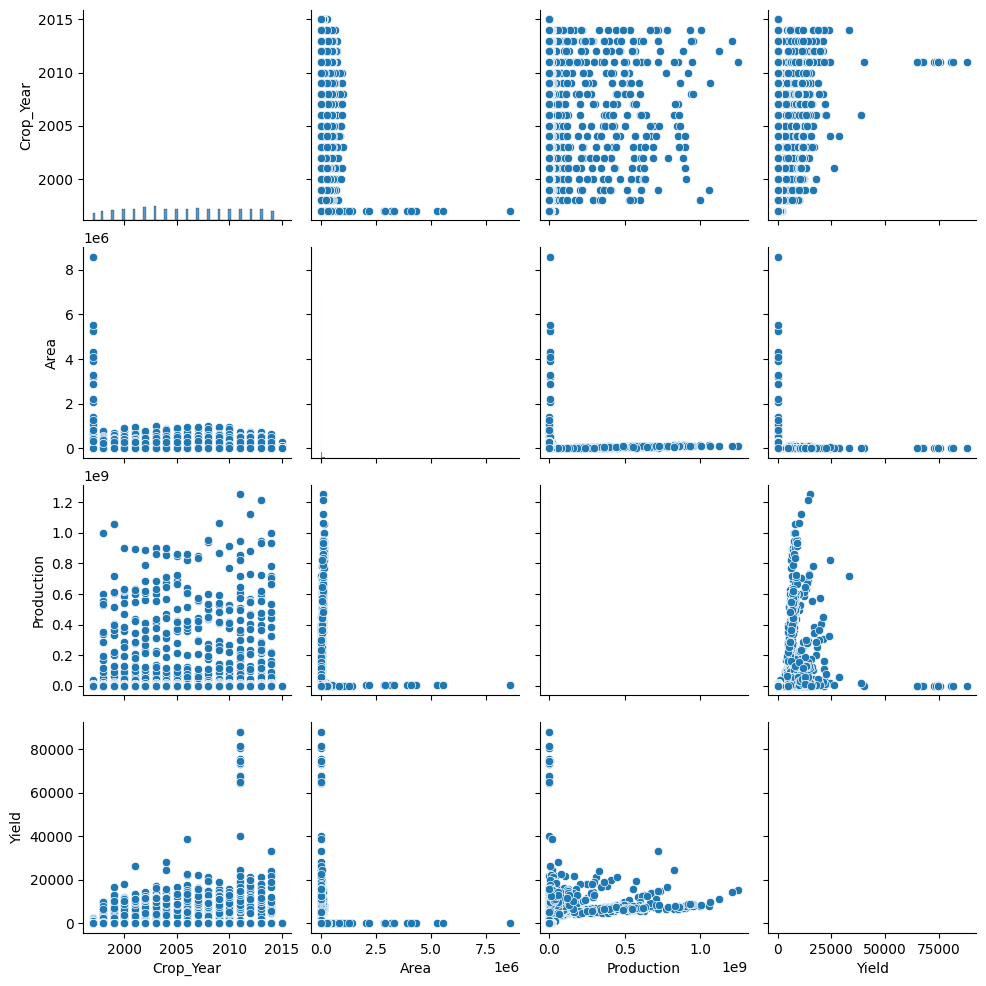

In [12]:
# Visualizing the features

ax = sns.pairplot(crop_data)
ax

In [13]:
# Dropping unnecessary columns

data = crop_data.drop(['State_Name'], axis = 1)
data

,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
...,...,...,...,...,...,...,...
246086,PURULIA,2014,Summer,Rice,306.0,801.0,2.617647
246087,PURULIA,2014,Summer,Sesamum,627.0,463.0,0.738437
246088,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,50.154321
246089,PURULIA,2014,Winter,Rice,279151.0,597899.0,2.141848


In [14]:
data.corr(numeric_only=True)

,Crop_Year,Area,Production,Yield
Crop_Year,1.000000,-0.025305,0.006989,0.013499
Area,-0.025305,1.000000,0.040587,0.001822
Production,0.006989,0.040587,1.000000,0.330961
Yield,0.013499,0.001822,0.330961,1.000000


Text(0.5, 1.0, 'Correlation matrix')

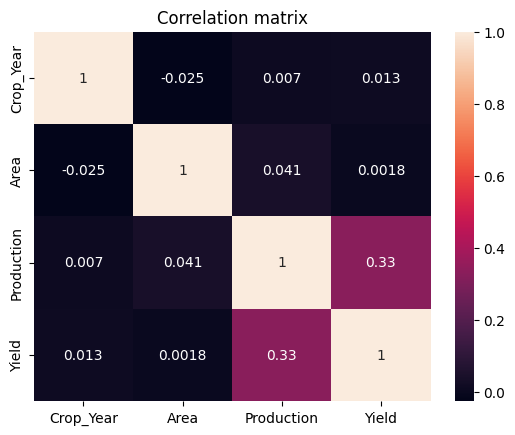

In [15]:
sns.heatmap(data.corr(numeric_only=True), annot = True)
plt.title('Correlation matrix')

In [16]:
dummy = pd.get_dummies(data)
dummy

,Crop_Year,Area,Production,Yield,District_Name_24 PARAGANAS NORTH,District_Name_24 PARAGANAS SOUTH,District_Name_ADILABAD,District_Name_AGAR MALWA,District_Name_AGRA,District_Name_AHMADABAD,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,2000,1254.0,2000.0,1.594896,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2000,2.0,1.0,0.500000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2000,102.0,321.0,3.147059,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2000,176.0,641.0,3.642045,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2000,720.0,165.0,0.229167,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,2014,306.0,801.0,2.617647,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
246087,2014,627.0,463.0,0.738437,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
246088,2014,324.0,16250.0,50.154321,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
246089,2014,279151.0,597899.0,2.141848,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
from sklearn.model_selection import train_test_split

x = dummy.drop(["Production","Yield"],axis = 1)
y = dummy["Production"]

# Splitting dataset -25% test dataset and 75% train dataset.

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=5)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (181770, 778)
x_test : (60591, 778)
y_train : (181770,)
y_test : (60591,)


In [18]:
print(x_train)
print(y_train)

        Crop_Year    Area  District_Name_24 PARAGANAS NORTH  \
201072       2013    16.0                             False   
191897       1998  5400.0                             False   
43814        2000  2968.0                             False   
32815        2013   211.0                             False   
62249        2006  1700.0                             False   
...           ...     ...                               ...   
236131       2000   207.0                             False   
127145       2007    39.0                             False   
20536        2005    43.0                             False   
18709        2011  2489.0                             False   
35767        1999    67.0                             False   

        District_Name_24 PARAGANAS SOUTH  District_Name_ADILABAD  \
201072                             False                   False   
191897                             False                   False   
43814                              Fals

## Linear Regression

In [19]:
# Training the Simple Linear Regression model.

from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
lr_predict = model_lr.predict(x_test)
lr_predict

array([ -150424.14134603,   485380.56765821, -1269080.84029446, ...,
         141974.10966129, -1736536.69722943,   287191.5565843 ],
      shape=(60591,))

In [21]:
model_lr.score(x_test,y_test)

0.17831996777023673

In [22]:
from sklearn.metrics import r2_score

r = r2_score(y_test,lr_predict)
print("R2 Score :",r)

R2 Score : 0.17831996777023673


Text(0.5, 1.0, 'Linear Regression')

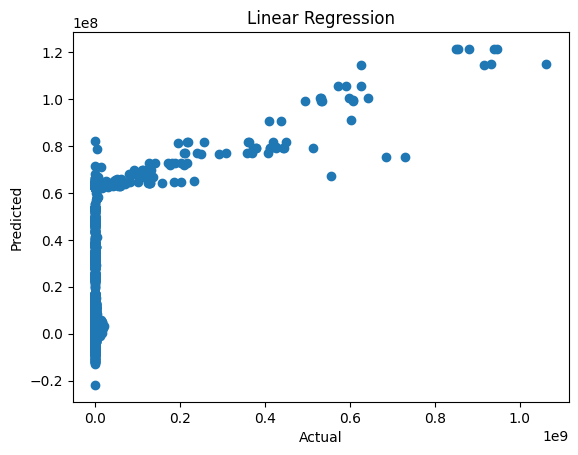

In [23]:
plt.scatter(y_test,lr_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

#### Clearly, the dataset is not good for linear regression.


#### Assumption of Linear Regression
#### 1. Linearity
#### 2. Homoscedasticity
#### 3. Multivariate normality
#### 4. Lack of multicollinearity

## Random Forest Algorithm

In [24]:
model_ra = RandomForestRegressor(n_estimators = 11)
model_ra.fit(x_train,y_train)

,n_estimators,11
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
rf_predict = model_ra.predict(x_test)
rf_predict

array([ 3803.56363636,   666.36363636,  2270.09090909, ...,
         245.79090909, 10109.27272727,   109.09090909], shape=(60591,))

In [26]:
model_ra.score(x_test,y_test)

0.9757057939660159

In [27]:
# Calculating R2 Score

from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score: ", r1)

R2 score:  0.9757057939660159


In [28]:
# Calculating Adj. R2 Score:

Adjr2_1 = 1-(1-r1)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared :{}".format(Adjr2_1))

Adj. R-Squared :0.9753897889453772


/var/folders/zs/740q0x8j51ldg8r78cqky7f00000gn/T/ipykernel_5458/1542215506.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color = "r", label = "Actual Value")
/var/folders/zs/740q0x8j51ldg8r78cqky7f00000gn/T/ipykernel_5458/1542215506.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29

Text(0.5, 1.0, 'Random Forest Regression')

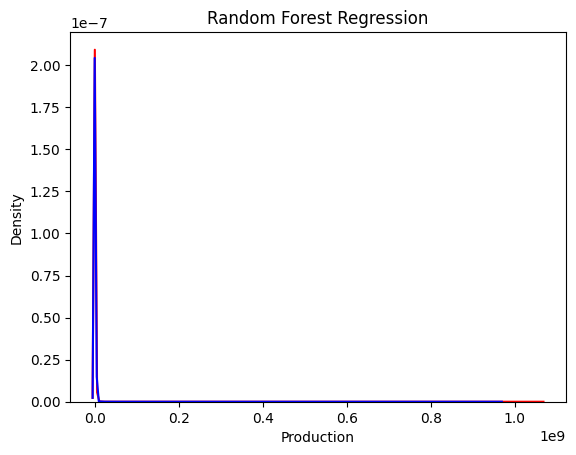

In [29]:
ax = sns.distplot(y_test, hist=False, color = "r", label = "Actual Value")
sns.distplot(rf_predict, hist=False, color = "b", label = "Predicted Values", ax=ax)
plt.title('Random Forest Regression')

#### Comparision between Linear Regression Algorithm and Random Forest Algorithm.

#### 1. Linear regression algorithm is not all accurate for this kind of prediction.
#### 2. Random Forest Algorithm has higher accuracy (between 85% - 90%), but it is slow. 

## Support Vector Regression

In [30]:
# Feature Scaling

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [31]:
print(x_train)
print(x_test)

[[ 1.48595619 -0.23975403 -0.04335347 ... -0.00663427 -0.01707812
  -0.05064325]
 [-1.53721105 -0.13355238 -0.04335347 ... -0.00663427 -0.01707812
  -0.05064325]
 [-1.13412208 -0.18152459 -0.04335347 ... -0.00663427 -0.01707812
  -0.05064325]
 ...
 [-0.12639967 -0.23922144 -0.04335347 ... -0.00663427 -0.01707812
  -0.05064325]
 [ 1.08286723 -0.19097307 -0.04335347 ... -0.00663427 -0.01707812
  -0.05064325]
 [-1.33566656 -0.23874803 -0.04335347 ... -0.00663427 -0.01707812
  -0.05064325]]
[[-0.93403377 -0.03987163 -0.04436049 ... -0.00574537 -0.01675257
  -0.0461906 ]
 [-0.52983249 -0.21597811 -0.04436049 ... -0.00574537 -0.01675257
  -0.0461906 ]
 [ 0.48067071 -0.21443929 -0.04436049 ... -0.00574537 -0.01675257
  -0.0461906 ]
 ...
 [ 0.68277135 -0.22959368 -0.04436049 ... -0.00574537 -0.01675257
  -0.0461906 ]
 [-0.12563121  0.06367688 -0.04436049 ... -0.00574537 -0.01675257
  -0.0461906 ]
 [-0.12563121 -0.2348724  -0.04436049 ... -0.00574537 -0.01675257
  -0.0461906 ]]


In [ ]:
# Training the SVR model

regressor = SVR(kernel='rbf')
regressor.fit(x_train,y_train)

In [ ]:
# Predicting Result

svr_predict = regressor.predict(x_test)
svr_predict

In [ ]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(svr_predict, hist=False, color="b", label="Predicted Value")
plt.title('Support Vector Regression')

In [ ]:
### Decision Tree

In [ ]:
# Training Model

regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(x_train,y_train)


# Predicting Results

decisiontree_predict = regressor.predict(x_test)
decisiontree_predict

In [ ]:
regressor.score(x_test,y_test)

In [ ]:
# Calculating Adj. R2 Score

Adjr2_2 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

print("Adj. R-Squared: {}".format(Adjr2_r))

In [ ]:
ax = sns.distplot(y_test, hist=False, color="r",label="Actual value")
sns.distplot(decisiontree_predict, hist=False, color="b", label = "Predicted Values", ax=ax)
plt.title('Decision Tree Regression')

In [ ]:
### Cross-Validation

In [ ]:

accuracies = cross_val_score(estimator=model, X=x_train, y=y_train, cv=10)

In [ ]:
a1 = (accuracies.mean()*100)
b1 = (accuracies.std()*100)

In [ ]:
# Mean Accuracy and SD of 10 fold results

print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

In [ ]:
## Cross-Validation

In [ ]:

accuracies = cross_val_score(estimator = regressor, X = x_train, y=y_train)

In [ ]:
#Create dataset of accuracy of different models

Algorithms = ['Random Forest','Decision-tree']
Accuracy = [a1,a2]

x_pos = np.arange(len(Accuracy))

# Create Bar Chart with different colours.

plt.bar(x_pos,Accuracy,color=['#488AC7','#ff8c00'])
plt.xticks(x_pos, Algorithms)
plt.ylabel('Accuracy(in%)')
plt.xlabel('Machine Learning Regression Technique')

plt.show()

In [ ]:
Algorithms = ['Random Forest','Decision-tree']
Std_dev = [b1,b2]

x_pos = np.arrange(len(Std_dev))

# Create Bar Chart with different colours.

plt.bar(x_pos,Accuracy,color=['#488AC7','#ff8c00'])
plt.xticks(x_pos, Std_dev)
plt.ylabel('Standard Deviation(in%)')
plt.xlabel('Machine Learning Regression Technique')

plt.show()

In [ ]:
r_score_data = [r1,r2]

x_pos = np.arrange(len(r_score_data))

# Create Bar Chart with different colours.
plt.bar(x_pos,Accuracy,color=['#488AC7','#ff8c00'])
plt.xticks(x_pos, r_score_data)
plt.ylabel('R-Squared Score')
plt.xlabel('Machine Learning Regression Technique')

plt.show()

In [ ]:
Adj_r2_data = [Adjr2_1, Adjr2_2]

x_pos = np.arrange(len(Adj_r2_data))

# Create Bar Chart with different colours.
plt.bar(x_pos,Accuracy,color=['#488AC7','#ff8c00'])
plt.xticks(x_pos, Adj_r2_data)
plt.ylabel('Adjusted R-Square Score')
plt.xlabel('Machine Learning Regression Technique')

plt.show()

In [ ]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)

print('Mean Absolute Error:',metrics.mean_absolute_error(rf_predict,y_test))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, rf_predict))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, rf_predict)))

In [ ]:
### to check

#set width of bar

barWidth = 0.25
fig = plt.subplots(figsize = (8,5))

#Set height of bar

Algorithms = ['Random Forest','Decision-tree']
Accuracy = [a1,a2]
Standard_Deviation = [b1,b2]

#Set position of bar on x-axis
br1 = np.arrange(len(Accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# plot
plt.bar(br1, Accuracy, color='blue', width = barWidth, edgecolor='grey',label='Accuracy')
plt.bar(br2, Standard_Deviation, color='maroon', width = barWidth, edgecolor='grey',label='Standard Deviation')

plt.xlabel('Algorithms', fontweight='bold', fontsize=10)
plt.ylabel('Accuracy (in %)', fontweight='bold', fontsize=10)
plt.xticks([r + barWidth for r in range(len(Accuracy))],Algorithms)
plt.legend()
plt.show()

In [ ]:
### Hyperparameter Tuning Using GridSearchCV

In [ ]:
Random Forest Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining parameter range

param_grid = {'C': [0.1,1,10,100],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'gamma': ['auto'],
              'kernel': ['rbf','linear']}

reg = GridSearchCV(DecisionTreeRegressor(), param_grid, refit = True, verbose=3, n_jobs=-1)

reg.fit(x_train,y_train)
reg.grid_scores_